In [22]:
rm( list=ls() )  #Borro todos los objetos
gc()   #Garbage Collection

used    (Mb) gc trigger (Mb) max used (Mb)
Ncells  937048 50.1 1835304    98.1  1835304 98.1
Vcells 1664884 12.8 9804476    74.9 12255594 93.6

In [23]:
library(ggplot2)
library(cowplot)
library(randomForest)


In [24]:
url <- "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
data <- read.csv(url,header = FALSE)

In [25]:
head(data)

V1 V2 V3 V4  V5  V6 V7 V8  V9 V10 V11 V12 V13 V14
1 63 1  1  145 233 1  2  150 0  2.3 3   0.0 6.0 0  
2 67 1  4  160 286 0  2  108 1  1.5 2   3.0 3.0 2  
3 67 1  4  120 229 0  2  129 1  2.6 2   2.0 7.0 1  
4 37 1  3  130 250 0  0  187 0  3.5 3   0.0 3.0 0  
5 41 0  2  130 204 0  2  172 0  1.4 1   0.0 3.0 0  
6 56 1  2  120 236 0  0  178 0  0.8 1   0.0 3.0 0

In [26]:
colnames(data) <- c(
    "age",
    "sex",
    "cp",
    "trestbps",
    "chol",
    "fbs",
    "restecg",
    "thalach",
    "exang",
    "oldpeak",
    "slope",
    "ca",
    "thal",
    "hd"
)
head(data)

age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca  thal hd
1 63  1   1  145      233  1   2       150     0     2.3     3     0.0 6.0  0 
2 67  1   4  160      286  0   2       108     1     1.5     2     3.0 3.0  2 
3 67  1   4  120      229  0   2       129     1     2.6     2     2.0 7.0  1 
4 37  1   3  130      250  0   0       187     0     3.5     3     0.0 3.0  0 
5 41  0   2  130      204  0   2       172     0     1.4     1     0.0 3.0  0 
6 56  1   2  120      236  0   0       178     0     0.8     1     0.0 3.0  0

In [27]:
str(data)

'data.frame':	303 obs. of  14 variables:
 $ age     : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : num  1 1 1 1 0 1 0 0 1 1 ...
 $ cp      : num  1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : num  1 0 0 0 0 0 0 0 0 1 ...
 $ restecg : num  2 2 2 0 2 0 2 0 2 2 ...
 $ thalach : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : num  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : num  3 2 2 3 1 1 3 1 2 3 ...
 $ ca      : chr  "0.0" "3.0" "2.0" "0.0" ...
 $ thal    : chr  "6.0" "3.0" "7.0" "3.0" ...
 $ hd      : int  0 2 1 0 0 0 3 0 2 1 ...


In [28]:
data[data=="?"] <- NA

data[data$sex == 0,]$sex <- "F"
data[data$sex == 1,]$sex <- "M"
data$sex  <- as.factor(data$sex)

data$cp  <- as.factor(data$cp)
data$fbs  <- as.factor(data$fbs)
data$restecg  <- as.factor(data$restecg)
data$exang  <- as.factor(data$exang)
data$slope  <- as.factor(data$slope)

data$ca  <- as.integer(data$ca)
data$ca  <- as.factor(data$ca)

data$thal  <- as.integer(data$thal)
data$thal  <- as.factor(data$thal)

data$hd <- ifelse(test=data$hd == 0, yes="Healthy", no="Unhealthy")
data$hd <- as.factor(data$hd)

str(data)
head(data)

'data.frame':	303 obs. of  14 variables:
 $ age     : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : Factor w/ 2 levels "F","M": 2 2 2 2 1 2 1 1 2 2 ...
 $ cp      : Factor w/ 4 levels "1","2","3","4": 1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 2 ...
 $ restecg : Factor w/ 3 levels "0","1","2": 3 3 3 1 3 1 3 1 3 3 ...
 $ thalach : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 2 1 2 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : Factor w/ 3 levels "1","2","3": 3 2 2 3 1 1 3 1 2 3 ...
 $ ca      : Factor w/ 4 levels "0","1","2","3": 1 4 3 1 1 1 3 1 2 1 ...
 $ thal    : Factor w/ 3 levels "3","6","7": 2 1 3 1 1 1 1 1 3 3 ...
 $ hd      : Factor w/ 2 levels "Healthy","Unhealthy": 1 2 2 1 1 1 2 1 2 2 ...


age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal
1 63  M   1  145      233  1   2       150     0     2.3     3     0  6   
2 67  M   4  160      286  0   2       108     1     1.5     2     3  3   
3 67  M   4  120      229  0   2       129     1     2.6     2     2  7   
4 37  M   3  130      250  0   0       187     0     3.5     3     0  3   
5 41  F   2  130      204  0   2       172     0     1.4     1     0  3   
6 56  M   2  120      236  0   0       178     0     0.8     1     0  3   
  hd       
1 Healthy  
2 Unhealthy
3 Unhealthy
4 Healthy  
5 Healthy  
6 Healthy

In [29]:
set.seed(42)
data.imputed  <-  rfImpute(hd ~ ., data = data, iter = 6)

ntree      OOB      1      2
  300:  17.49% 12.80% 23.02%
ntree      OOB      1      2
  300:  16.83% 14.02% 20.14%
ntree      OOB      1      2
  300:  17.82% 13.41% 23.02%
ntree      OOB      1      2
  300:  17.49% 14.02% 21.58%
ntree      OOB      1      2
  300:  17.16% 12.80% 22.30%
ntree      OOB      1      2
  300:  18.15% 14.63% 22.30%


In [30]:
model  <-  randomForest(hd ~., data=data.imputed, proximity=TRUE)

In [31]:
model


Call:
 randomForest(formula = hd ~ ., data = data.imputed, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 16.83%
Confusion matrix:
          Healthy Unhealthy class.error
Healthy       142        22   0.1341463
Unhealthy      29       110   0.2086331

In [32]:
oob.error.data  <-  data.frame(
    Trees = rep(1:nrow(model$err.rate), times = 3),
    Type = rep(c("OOB", "Healthy", "Unhealthy"), each=nrow(model$err.rate)),
    Error = c(model$err.rate[,"OOB"],
        model$err.rate[,"Healthy"],
        model$err.rate[,"Unhealthy"])
    )

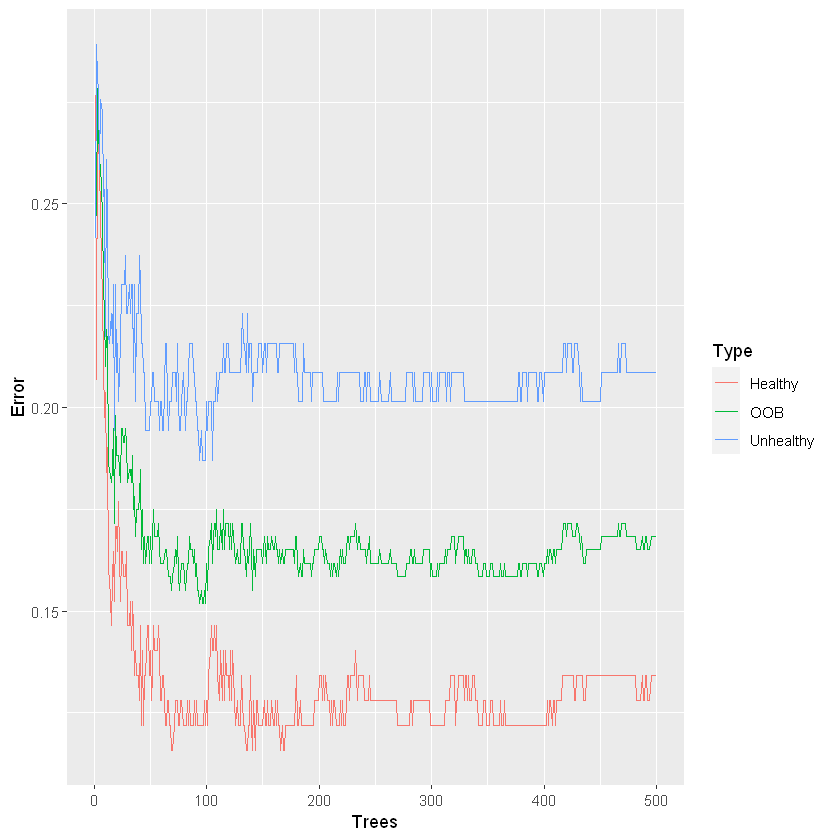

In [33]:
ggplot(
    data = oob.error.data,
    aes(x = Trees, y = Error)) +
    geom_line(aes(color = Type))

In [34]:
oob.values <- vector(length = 10)
for (i in 1:10){
    temp.model  <-  randomForest(hd ~ . , data = data.imputed, mtry= i, ntree = 1000)
    oob.values[i] <- temp.model$err.rate[nrow(temp.model$err.rate),1]
}
oob.values

[1] 0.1716172 0.1716172 0.1584158 0.1815182 0.1749175 0.1881188 0.1881188
 [8] 0.1914191 0.1947195 0.1947195

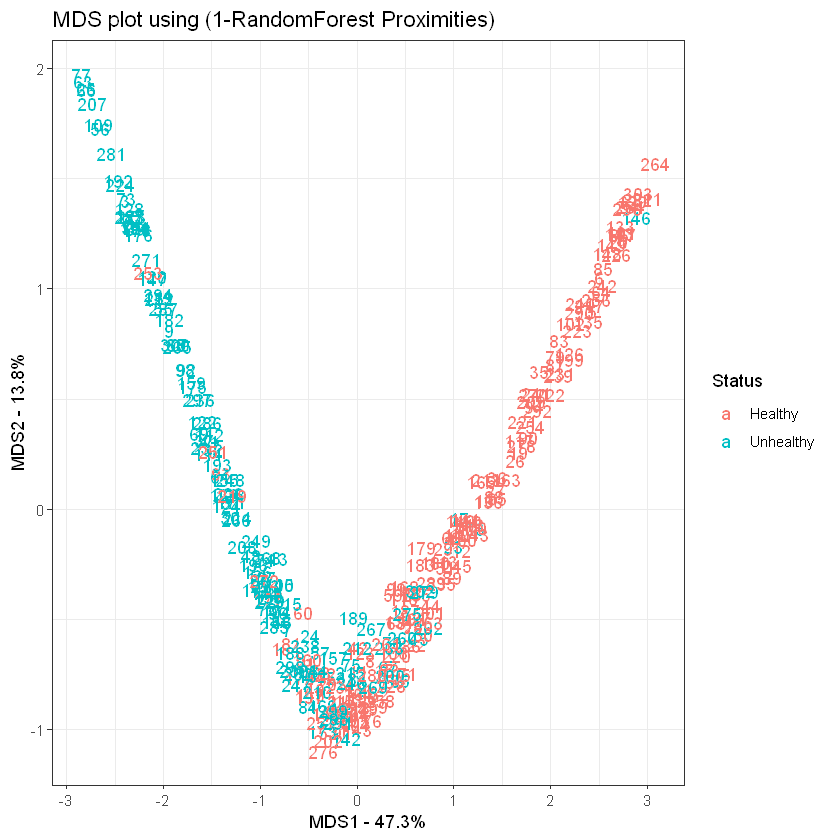

In [35]:
distance.matrix <- dist(1-model$proximity)

mds.stuff <- cmdscale(distance.matrix, eig = TRUE, x.ret = TRUE)

mds.var.per <- round(mds.stuff$eig/sum(mds.stuff$eig)*100,1)

mds.values <- mds.stuff$points
mds.data <- data.frame(Sample = rownames(mds.values),
    X = mds.values[,1],
    Y = mds.values[,2],
    Status = data.imputed$hd
)

ggplot(data = mds.data,
    aes(x = X, y = Y, label = Sample)) +
    geom_text(aes(color = Status)) +
    theme_bw() + 
    xlab(paste("MDS1 - ", mds.var.per[1], "%", sep = "")) +
    ylab(paste("MDS2 - ", mds.var.per[2], "%", sep = "")) +
    ggtitle("MDS plot using (1-RandomForest Proximities)"
    )


the original call to randomForest

In [36]:
model$call

randomForest(formula = hd ~ ., data = data.imputed, proximity = TRUE)

one of regression, classification, or unsupervised

In [37]:
model$type

[1] "classification"

the predicted values of the input data based on out-of-bag samples.

In [38]:
model$predicted

1         2         3         4         5         6         7         8 
  Healthy Unhealthy Unhealthy   Healthy   Healthy   Healthy Unhealthy   Healthy 
        9        10        11        12        13        14        15        16 
Unhealthy Unhealthy   Healthy   Healthy Unhealthy   Healthy   Healthy   Healthy 
       17        18        19        20        21        22        23        24 
  Healthy   Healthy   Healthy   Healthy Unhealthy   Healthy   Healthy Unhealthy 
       25        26        27        28        29        30        31        32 
Unhealthy   Healthy   Healthy   Healthy   Healthy Unhealthy   Healthy Unhealthy 
       33        34        35        36        37        38        39        40 
  Healthy   Healthy   Healthy   Healthy Unhealthy Unhealthy Unhealthy Unhealthy 
       41        42        43        44        45        46        47        48 
Unhealthy   Healthy   Healthy   Healthy   Healthy Unhealthy   Healthy Unhealthy 
       49        50        51        52        53        54        55        56 
  Healthy   Healthy   Healthy   Healthy Unhealthy   Healthy Unhealthy Unhealthy 
       57        58        59        60        61        62        63        64 
  Healthy   Healthy   Healthy Unhealthy Unhealthy   Healthy Unhealthy   Healthy 
       65        66        67        68        69        70        71        72 
Unhealthy Unhealthy   Healthy   Healthy Unhealthy   Healthy   Healthy Unhealthy 
       73        74        75        76        77        78        79        80 
Unhealthy Unhealthy Unhealthy   Healthy Unhealthy   Healthy   Healthy Unhealthy 
       81        82        83        84        85        86        87        88 
Unhealthy   Healthy   Healthy Unhealthy   Healthy   Healthy   Healthy   Healthy 
       89        90        91        92        93        94        95        96 
  Healthy   Healthy   Healthy Unhealthy Unhealthy   Healthy   Healthy Unhealthy 
       97        98        99       100       101       102       103       104 
Unhealthy Unhealthy   Healthy   Healthy   Healthy   Healthy Unhealthy   Healthy 
      105       106       107       108       109       110       111       112 
Unhealthy   Healthy Unhealthy Unhealthy Unhealthy Unhealthy Unhealthy Unhealthy 
      113       114       115       116       117       118       119       120 
  Healthy Unhealthy Unhealthy   Healthy   Healthy   Healthy Unhealthy Unhealthy 
      121       122       123       124       125       126       127       128 
Unhealthy Unhealthy   Healthy Unhealthy   Healthy   Healthy Unhealthy Unhealthy 
      129       130       131       132       133       134       135       136 
  Healthy   Healthy   Healthy Unhealthy   Healthy   Healthy   Healthy   Healthy 
      137       138       139       140       141       142       143       144 
Unhealthy Unhealthy Unhealthy   Healthy   Healthy   Healthy   Healthy Unhealthy 
      145       146       147       148       149       150       151       152 
Unhealthy   Healthy Unhealthy   Healthy   Healthy   Healthy Unhealthy   Healthy 
      153       154       155       156       157       158       159       160 
  Healthy Unhealthy Unhealthy Unhealthy   Healthy Unhealthy Unhealthy Unhealthy 
      161       162       163       164       165       166       167       168 
  Healthy Unhealthy   Healthy   Healthy   Healthy   Healthy   Healthy   Healthy 
      169       170       171       172       173       174       175       176 
Unhealthy   Healthy Unhealthy Unhealthy Unhealthy   Healthy Unhealthy Unhealthy 
      177       178       179       180       181       182       183       184 
Unhealthy Unhealthy   Healthy   Healthy   Healthy Unhealthy   Healthy Unhealthy 
      185       186       187       188       189       190       191       192 
  Healthy   Healthy   Healthy Unhealthy   Healthy Unhealthy   Healthy Unhealthy 
      193       194       195       196       197       198       199       200 
Unhealthy Unhealthy   Healthy Unhealthy

a matrix with nclass + 2 (for classification) or two (for regression) columns. For classification, the first nclass columns are the class-specific measures computed as mean descrease in accuracy. The nclass + 1st column is the mean descrease in accuracy over all classes. The last column is the mean decrease in Gini index. For Regression, the first column is the mean decrease in accuracy and the second the mean decrease in MSE. If importance=FALSE, the last measure is still returned as a vector.

In [39]:
model$importance


MeanDecreaseGini
age      12.736551       
sex       4.547216       
cp       19.460096       
trestbps 10.828128       
chol     12.178045       
fbs       1.143352       
restecg   2.741814       
thalach  17.520820       
exang     8.111795       
oldpeak  15.799083       
slope     7.225386       
ca       18.678195       
thal     17.357895

The ``standard errors'' of the permutation-based importance measure. For classification, a p by nclass + 1 matrix corresponding to the first nclass + 1 columns of the importance matrix. For regression, a length p vector.

In [40]:
model$importanceSD

NULL

a p by n matrix containing the casewise importance measures, the [i,j] element of which is the importance of i-th variable on the j-th case. NULL if localImp=FALSE.

In [41]:
model$localImp


NULL

number of trees grown.

In [42]:
model$ntree


[1] 500

number of predictors sampled for spliting at each node.

In [43]:
model$mtry


[1] 3

a list that contains the entire forest; NULL if randomForest is run in unsupervised mode or if keep.forest=FALSE.

In [44]:
model$forest

$ndbigtree
  [1]  93 101 105  99  99  93 103 105 103  95 113  91  97  75  93 111 113 107
 [19]  99  99 119 103  91 109  87  81 109 111 101  97 111  95  91 113 107 105
 [37]  95 109  79  89 113 105 115  97  97 101  95 101  91 105  87  95  99  97
 [55] 103  89 111 115  87 101 115 115  93 111  93  77 105 105  97 103 101 113
 [73]  97 123  91 103 117 105 121  93 115 111  93  93  93 117 121 107 105  79
 [91] 107  93  75  91 107 101  91 105 101  89  99 113 107  95 103 111 111  85
[109] 105 103 113  99  79  97  87  93  85  91  79 133  97 109 117 109 105 103
[127]  91 115 119  91  99  91  99 117  93 113 107 107 109  75  85 101  95  99
[145] 103 109 101 115  95 103 109 109  85  89 113  87 119  79  87  97 123 127
[163] 107  99 101  95  97 107 105 111 125 119 115  81 101  77 111 111 105  95
[181] 107 117  95  99 113  93  91 133  99  83 123 109 111 103 103 119 101 103
[199]  91 105 111 127  89 107 103  97  91 117  91 125  95 119 115  91  97  89
[217]  97  89  81  91  93 105 113  81 105 113 105 101 103  97 111  97  89  97
[235]  85  75  85 105  97  97 119  95  97 109 103 111 117 107  95  81 129 103
[253]  95 105  97 101 105 107  93  83  85 103  93  81 105  91 117 123 107 105
[271]  83  97  87  89 111  97  99  91  93 113  99  83  97 103  89  83  89  81
[289] 123  91 105  93  79 105  95 113  75 121 127 107  93 107  83  99 117  99
[307]  91  99  93 107  99  91 115  89 115 119  91 121 101 115 109 115 111 101
[325] 113 105  93  91  77 103  83  91 107  87 101  95  99 109 123  97  85  95
[343]  95  99 113 107 101  99 101 109  93 107  97  73  85  79 107  93 109 107
[361]  99 113 111  97 123  97  81 117 103  91 101  75  87 127  93  93  93 101
[379]  89  95 103 113 113  83  81  73  99  99  93 101  99 101  91  97  85  83
[397] 103  99  89  89  95  99 107  97 109 103 103  97 109  97  99  95  83 115
[415] 127  97 113 107  75  91 105  85  83  97  99 121  97 107  95  91 113 109
[433] 123  87  89  99  91 127  91 115  99 103  87  95 105  95 119  95  89  97
[451]  97 109 111 103 109  87  93  89 107  97  99 103 109 111 115  95 109 107
[469]  91  79 109 109 101 101  91 113  93 101 113  91  85 117  99 101 109 101
[487] 107 103 107  93 113  97 101  99 119 115 115 125 113 103

$nodestatus
       [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
  [1,]    1    1    1    1    1    1    1    1    1     1     1     1     1
  [2,]    1    1    1    1    1    1    1    1    1     1     1     1     1
  [3,]    1    1    1    1    1    1    1    1    1     1     1     1     1
  [4,]    1    1    1    1    1    1    1    1    1     1     1     1     1
  [5,]    1    1    1    1    1    1    1    1    1     1     1     1     1
  [6,]    1    1   -1    1    1    1    1    1    1     1     1     1     1
  [7,]   -1    1    1    1    1    1    1    1    1     1     1     1     1
  [8,]   -1    1    1    1   -1   -1   -1    1    1    -1     1     1     1
  [9,]   -1    1    1    1    1    1   -1    1    1     1     1     1     1
 [10,]    1    1    1    1    1    1    1    1    1     1    -1     1     1
 [11,]    1    1    1   -1   -1    1    1    1    1     1     1     1    -1
 [12,]    1    1    1    1    1    1    1    1    1    -1     1    -1     1
 [13,]    1    1    1    1    1    1   -1    1    1     1     1     1    -1
 [14,]   -1    1    1    1    1    1    1    1    1     1    -1     1     1
 [15,]    1    1    1    1   -1   -1    1    1   -1    -1     1     1    -1
 [16,]    1   -1    1    1    1    1    1   -1    1     1    -1    -1     1
 [17,]    1    1    1   -1    1   -1    1    1    1     1     1     1     1
 [18,]    1   -1    1    1    1    1    1   -1   -1     1     1     1     1
 [19,]    1    1    1    1    1    1   -1   -1    1     1    -1     1     1
 [20,]    1    1    1    1    1    1    1    1    1     1     1     1     1
 [21,]    1    1   -1   -1    1   -1    1    1   -1     1    -1     1    -1
 [22,]    1    1    1    1   -1    1   -1    1    1     1    -1     1     1
 [23,]    1    1   -1    1    1   -1    1   -1   -1     1   

(classification only) vector error rates of the prediction on the input data, the i-th element being the (OOB) error rate for all trees up to the i-th

In [45]:
model$err.rate

OOB       Healthy   Unhealthy
 [1,] 0.2571429 0.2765957 0.2413793
 [2,] 0.2470588 0.2068966 0.2891566
 [3,] 0.2783019 0.2758621 0.2812500
 [4,] 0.2704918 0.2647059 0.2777778
 [5,] 0.2592593 0.2600000 0.2583333
 [6,] 0.2597865 0.2467532 0.2755906
 [7,] 0.2474227 0.2264151 0.2727273
 [8,] 0.2297297 0.2111801 0.2518519
 [9,] 0.2233333 0.1975309 0.2536232
[10,] 0.2100000 0.2037037 0.2173913
[11,] 0.2192691 0.1840491 0.2608696
[12,] 0.2159468 0.1901840 0.2463768
[13,] 0.1860465 0.1595092 0.2173913
[14,] 0.1848185 0.1585366 0.2158273
[15,] 0.1815182 0.1463415 0.2230216
[16,] 0.1848185 0.1585366 0.2158273
[17,] 0.1947195 0.1646341 0.2302158
[18,] 0.1716172 0.1524390 0.1942446
[19,] 0.1980198 0.1707317 0.2302158
[20,] 0.1881188 0.1707317 0.2086331
[21,] 0.1881188 0.1646341 0.2158273
[22,] 0.1881188 0.1768293 0.2014388
[23,] 0.1815182 0.1524390 0.2158273
[24,] 0.1947195 0.1646341 0.2302158
[25,] 0.1947195 0.1646341 0.2302158
[26,] 0.1914191 0.1585366 0.2302158
[27,] 0.1914191 0.1585366 0.2302158
[28,] 0.1947195 0.1585366 0.2374101
[29,] 0.1914191 0.1646341 0.2230216
[30,] 0.1815182 0.1463415 0.2230216
[31,] ⋮         ⋮         ⋮        
[32,] 0.1716172 0.1341463 0.2158273
[33,] 0.1716172 0.1341463 0.2158273
[34,] 0.1683168 0.1341463 0.2086331
[35,] 0.1683168 0.1341463 0.2086331
[36,] 0.1683168 0.1341463 0.2086331
[37,] 0.1683168 0.1341463 0.2086331
[38,] 0.1683168 0.1341463 0.2086331
[39,] 0.1683168 0.1341463 0.2086331
[40,] 0.1683168 0.1341463 0.2086331
[41,] 0.1683168 0.1341463 0.2086331
[42,] 0.1683168 0.1341463 0.2086331
[43,] 0.1650165 0.1280488 0.2086331
[44,] 0.1650165 0.1280488 0.2086331
[45,] 0.1650165 0.1280488 0.2086331
[46,] 0.1650165 0.1280488 0.2086331
[47,] 0.1650165 0.1280488 0.2086331
[48,] 0.1683168 0.1341463 0.2086331
[49,] 0.1650165 0.1280488 0.2086331
[50,] 0.1650165 0.1280488 0.2086331
[51,] 0.1683168 0.1341463 0.2086331
[52,] 0.1683168 0.1341463 0.2086331
[53,] 0.1650165 0.1280488 0.2086331
[54,] 0.1650165 0.1280488 0.2086331
[55,] 0.1650165 0.1280488 0.2086331
[56,] 0.1683168 0.1341463 0.2086331
[57,] 0.1683168 0.1341463 0.2086331
[58,] 0.1683168 0.1341463 0.2086331
[59,] 0.1683168 0.1341463 0.2086331
[60,] 0.1683168 0.1341463 0.2086331
[61,] 0.1683168 0.1341463 0.2086331

(classification only) the confusion matrix of the prediction (based on OOB data).

In [46]:
model$confusion


Healthy Unhealthy class.error
Healthy   142      22       0.1341463  
Unhealthy  29     110       0.2086331

(classification only) a matrix with one row for each input data point and one column for each class, giving the fraction or number of (OOB) `votes' from the random forest.

In [47]:
model$votes


Healthy     Unhealthy  
1   0.660818713 0.339181287
2   0.077319588 0.922680412
3   0.046242775 0.953757225
4   0.595854922 0.404145078
5   0.993589744 0.006410256
6   0.962962963 0.037037037
7   0.358585859 0.641414141
8   0.556149733 0.443850267
9   0.071428571 0.928571429
10  0.261363636 0.738636364
11  0.693181818 0.306818182
12  0.839195980 0.160804020
13  0.340540541 0.659459459
14  0.732240437 0.267759563
15  0.752941176 0.247058824
16  0.812500000 0.187500000
17  0.810526316 0.189473684
18  0.738888889 0.261111111
19  0.901639344 0.098360656
20  0.965714286 0.034285714
21  0.440414508 0.559585492
22  0.695431472 0.304568528
23  0.778350515 0.221649485
24  0.410256410 0.589743590
25  0.005681818 0.994318182
26  0.941798942 0.058201058
27  0.831578947 0.168421053
28  0.543478261 0.456521739
29  0.788659794 0.211340206
30  0.200000000 0.800000000
⋮   ⋮           ⋮          
274 0.65405405  0.345945946
275 0.66265060  0.337349398
276 0.38947368  0.610526316
277 0.67222222  0.327777778
278 0.94152047  0.058479532
279 0.69886364  0.301136364
280 0.74456522  0.255434783
281 0.02072539  0.979274611
282 0.96842105  0.031578947
283 0.04444444  0.955555556
284 1.00000000  0.000000000
285 0.21153846  0.788461538
286 0.13368984  0.866310160
287 0.06818182  0.931818182
288 0.54245283  0.457547170
289 0.82631579  0.173684211
290 0.88953488  0.110465116
291 0.70253165  0.297468354
292 0.94565217  0.054347826
293 0.28491620  0.715083799
294 0.05670103  0.943298969
295 0.62189055  0.378109453
296 0.95953757  0.040462428
297 0.15789474  0.842105263
298 0.45604396  0.543956044
299 0.49696970  0.503030303
300 0.07425743  0.925742574
301 0.08780488  0.912195122
302 0.67597765  0.324022346
303 0.99453552  0.005464481

number of times cases are `out-of-bag' (and thus used in computing OOB error estimate)

In [48]:
model$oob.times


[1] 171 194 173 193 156 189 198 187 168 176 176 199 185 183 170 176 190 180
 [19] 183 175 193 197 194 195 176 189 190 184 194 190 179 208 197 181 206 194
 [37] 201 171 181 187 191 171 188 187 181 184 179 177 199 195 183 184 196 200
 [55] 189 203 165 187 170 182 161 192 180 179 194 182 174 168 186 198 170 204
 [73] 195 190 175 170 170 169 179 197 171 195 182 181 179 205 186 194 178 187
 [91] 184 175 193 183 197 222 200 182 186 167 188 193 174 193 176 197 170 182
[109] 171 180 171 174 197 181 166 176 177 171 172 187 177 203 184 173 188 185
[127] 178 178 189 171 181 163 191 185 194 192 184 205 170 174 183 188 198 182
[145] 174 201 184 174 175 172 170 212 198 181 187 172 188 168 188 183 179 175
[163] 175 192 167 183 176 177 184 175 176 194 198 176 184 199 177 200 179 163
[181] 186 222 204 193 169 173 186 173 200 183 198 196 177 191 201 185 189 183
[199] 164 188 166 190 209 179 177 189 172 181 170 183 164 175 177 205 193 175
[217] 178 204 165 176 186 166 178 183 179 181 184 197 169 160 170 188 173 160
[235] 175 182 188 183 187 175 191 205 186 173 177 175 184 168 201 182 169 173
[253] 194 195 199 187 179 184 181 193 198 181 206 172 189 186 194 192 175 169
[271] 168 161 214 185 166 190 180 171 176 184 193 190 180 180 208 187 176 212
[289] 190 172 158 184 179 194 201 173 209 182 165 202 205 179 183

if proximity=TRUE when randomForest is called, a matrix of proximity measures among the input (based on the frequency that pairs of data points are in the same terminal nodes).

In [49]:
model$proximity


1          2          3          4          5          6         
1   1.00000000 0.00000000 0.07142857 0.01666667 0.06153846 0.06666667
2   0.00000000 1.00000000 0.29411765 0.00000000 0.00000000 0.00000000
3   0.07142857 0.29411765 1.00000000 0.00000000 0.00000000 0.00000000
4   0.01666667 0.00000000 0.00000000 1.00000000 0.20000000 0.24657534
5   0.06153846 0.00000000 0.00000000 0.20000000 1.00000000 0.37500000
6   0.06666667 0.00000000 0.00000000 0.24657534 0.37500000 1.00000000
7   0.02739726 0.09090909 0.08064516 0.02702703 0.00000000 0.00000000
8   0.00000000 0.03947368 0.01428571 0.04000000 0.10909091 0.07575758
9   0.00000000 0.15384615 0.15625000 0.00000000 0.00000000 0.00000000
10  0.10526316 0.02985075 0.25000000 0.04918033 0.00000000 0.00000000
11  0.11538462 0.00000000 0.05263158 0.00000000 0.05172414 0.07812500
12  0.04166667 0.00000000 0.00000000 0.10294118 0.40000000 0.16216216
13  0.03278689 0.04411765 0.11428571 0.00000000 0.00000000 0.04838710
14  0.01724138 0.00000000 0.00000000 0.12162162 0.13207547 0.26470588
15  0.11764706 0.00000000 0.00000000 0.02816901 0.03921569 0.20338983
16  0.07272727 0.00000000 0.00000000 0.18055556 0.26666667 0.39393939
17  0.07575758 0.00000000 0.00000000 0.18840580 0.28985507 0.32352941
18  0.06557377 0.00000000 0.01587302 0.09859155 0.19354839 0.24590164
19  0.05172414 0.00000000 0.00000000 0.09230769 0.36842105 0.29411765
20  0.00000000 0.00000000 0.00000000 0.31034483 0.44827586 0.79710145
21  0.05882353 0.13253012 0.13432836 0.02631579 0.01562500 0.02816901
22  0.09090909 0.01282051 0.00000000 0.03614458 0.17857143 0.12121212
23  0.05970149 0.01470588 0.01492537 0.15189873 0.22222222 0.33766234
24  0.10714286 0.01234568 0.11764706 0.10526316 0.05084746 0.06578947
25  0.01754386 0.18461538 0.75925926 0.00000000 0.00000000 0.00000000
26  0.01639344 0.00000000 0.00000000 0.13750000 0.35593220 0.30000000
27  0.01562500 0.00000000 0.00000000 0.08333333 0.26984127 0.29411765
28  0.16923077 0.02816901 0.01724138 0.08695652 0.05555556 0.03448276
29  0.10000000 0.01388889 0.00000000 0.14705882 0.19354839 0.20289855
30  0.03333333 0.01333333 0.16666667 0.00000000 0.00000000 0.00000000
⋮   ⋮          ⋮          ⋮          ⋮          ⋮          ⋮         
274 0.03125000 0.01428571 0.03389831 0.00000000 0.04687500 0.01408451
275 0.01923077 0.01785714 0.00000000 0.04838710 0.12195122 0.19298246
276 0.13333333 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
277 0.00000000 0.05633803 0.01492537 0.00000000 0.06896552 0.01538462
278 0.01587302 0.00000000 0.00000000 0.11111111 0.20754717 0.16393443
279 0.01785714 0.03076923 0.01818182 0.05405405 0.14285714 0.16666667
280 0.03448276 0.00000000 0.00000000 0.02666667 0.10344828 0.05263158
281 0.01666667 0.17721519 0.52112676 0.00000000 0.00000000 0.00000000
282 0.02941176 0.00000000 0.00000000 0.24675325 0.38596491 0.60493827
283 0.01666667 0.10937500 0.58333333 0.00000000 0.00000000 0.00000000
284 0.00000000 0.00000000 0.00000000 0.23880597 0.50000000 0.55714286
285 0.02500000 0.02500000 0.01204819 0.00000000 0.00000000 0.00000000
286 0.06557377 0.09677419 0.32786885 0.02702703 0.00000000 0.00000000
287 0.06451613 0.23880597 0.38888889 0.01639344 0.00000000 0.00000000
288 0.04225352 0.00000000 0.01333333 0.00000000 0.00000000 0.01315789
289 0.06349206 0.00000000 0.00000000 0.03614458 0.12698413 0.22972973
290 0.01886792 0.00000000 0.00000000 0.14285714 0.25454545 0.63492063
291 0.12500000 0.00000000 0.01562500 0.00000000 0.00000000 0.03333333
292 0.01785714 0.00000000 0.00000000 0.15151515 0.54545455 0.42307692
293 0.06557377 0.02898551 0.22222222 0.01724138 0.00000000 0.01639344
294 0.01492537 0.16000000 0.49275362 0.01149425 0.00000000 0.00000000
295 0.00000000 0.06172840 0.01587302 0.00000000 0.01818182 0.01369863
296 0.03571429 0.00000000 0.00000000 0.22666667 0.42857143 0.63157895
297 0.05714286 0.16438356 0.23728814 0.00000000 0.00000000 0.00000000
298 0.00000000 0.04225352 0.03448276 0.00000000 0.01724138 0.00000000
299 0.12500000

(regression only) vector of mean square errors: sum of squared residuals divided by n.

In [50]:
model$mse

NULL

(regression only) ``pseudo R-squared'': 1 - mse / Var(y).

In [51]:
model$rsq

NULL

if test set is given (through the xtest or additionally ytest arguments), this component is a list which contains the corresponding predicted, err.rate, confusion, votes (for classification) or predicted, mse and rsq (for regression) for the test set. If proximity=TRUE, there is also a component, proximity, which contains the proximity among the test set as well as proximity between test and training data.

In [52]:
model$test

NULL